<a href="https://colab.research.google.com/github/Aayush2799/Urban-Spatial-Order/blob/main/Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proj_1**

In this Project, I examined the road structures of various cities using clustering algorithms. The Data was taken from Geoff Boeing's article "Urban Spatial Order: Street Network Orientation, Configuration, and Entropy" examined street network trends across 100 global cities. The major purpose was to understand how entropy and street length affect road quality.




In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/FDA Project 1/

/content/drive/MyDrive/FDA Project 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Step 1**

Loading Of Data
- The data was extracted from the PDF into Excel using Excel's 'Get Data' tool and then loaded into Google Colab.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FDA Project 1/FDA_P1 (1).csv')

In [ ]:
df.head()

,Region,City,Orientation,Entropy,Hw,Median,Average_Circuity,Average_Node,P(dead_ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


**Step 2**

Scaling Of Data (Preprocessing)
- Standardizing of Data is done using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler


# Select the numerical.columns you want to standardize
numerical_columns = ['Orientation', 'Entropy', 'Hw','Median','Average_Circuity','Average_Node','P(dead_ends)','P(4-way)']


#Initialize the StandardScaler
scaler = StandardScaler()

df2=df.copy()

# Fit the scaler to the selected numerical columns to transfer the data
df2[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df2

,Region,City,Orientation,Entropy,Hw,Median,Average_Circuity,Average_Node,P(dead_ends),P(4-way)
0,Asia/Oceania,Bangkok,-0.330477,0.353647,0.335401,-0.661487,0.111372,-2.045566,2.665745,-0.956809
1,Asia/Oceania,Beijing,0.699605,-0.541898,-0.396254,3.399520,-0.109897,0.235734,-0.157872,0.102948
2,Asia/Oceania,Hanoi,-0.755946,0.689477,0.692306,-0.668681,0.332640,-1.190078,1.235113,-1.004618
3,Asia/Oceania,Hong Kong,-0.746989,0.683258,0.665538,-0.790979,2.987859,0.034220,-0.421409,-0.430915
4,Asia/Oceania,Jakarta,-0.052803,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.344105,-1.052426
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,2.437309,-2.516451,-2.573373,0.511133,-1.031848,0.699599,-0.145322,1.122864
96,US/Canada,St Louis,0.435367,-0.296245,-0.339744,0.863638,-1.216238,0.920124,-0.622200,1.162705
97,US/Canada,Toronto,1.322133,-1.154476,-1.350974,0.723356,1.254591,0.269954,-0.484156,-0.088287
98,US/Canada,Vancouver,2.553753,-2.684366,-2.754799,0.744938,-1.253116,1.463834,-0.935935,1.808120


In [ ]:
column_to_drop = ['Region','City']
df2=df2.drop(column_to_drop,axis=1)

In [ ]:
df2.head()

,Orientation,Entropy,Hw,Median,Average_Circuity,Average_Node,P(dead_ends),P(4-way)
0,-0.330477,0.353647,0.335401,-0.661487,0.111372,-2.045566,2.665745,-0.956809
1,0.699605,-0.541898,-0.396254,3.399520,-0.109897,0.235734,-0.157872,0.102948
2,-0.755946,0.689477,0.692306,-0.668681,0.332640,-1.190078,1.235113,-1.004618
3,-0.746989,0.683258,0.665538,-0.790979,2.987859,0.034220,-0.421409,-0.430915
4,-0.052803,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.344105,-1.052426


**Step 3**

Correlation Analysis.

- To identify redundant variables, I checked the correlation matrix. Also, made a heatmap to show the relationships between variables.




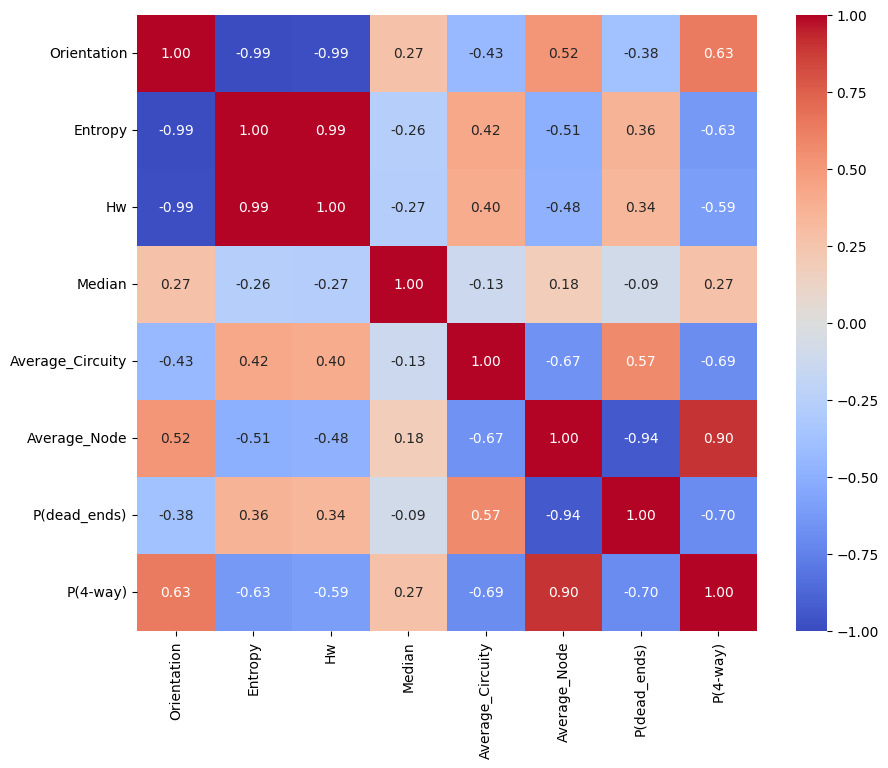

In [ ]:
# Before implementing K-means lets check corelation using heatmap
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.show()

In [ ]:
## Droping HW as it is higly corelated with Entropy
df2=df2.drop(['Hw','Average_Node'],axis=1)

**Step 4**

Elbow Method

- Used Elbow method to find optimal number of clusters.

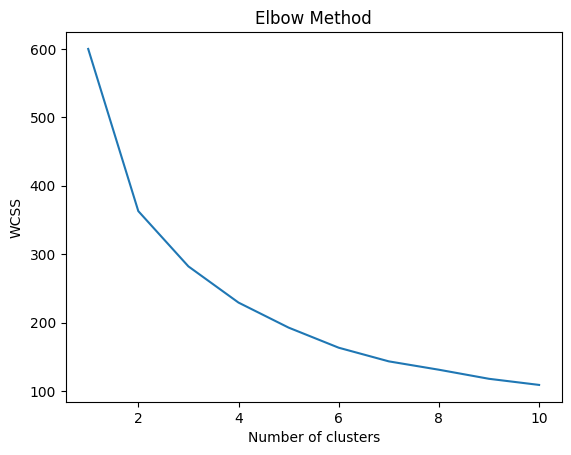

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10,random_state=0)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Step 5**

K-Means Clustering.

- Using k_mean Clustering, Set up the KMeans model at first. Fit the model to the standard features, Obtain the cluster assignments for every data point.

In [ ]:
# Implementing k_mean Clustering
k = 3


# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the standardized features
kmeans.fit(df2.iloc[:,1:])

labels = kmeans.predict(df2.iloc[:,1:])

# Get cluster assignments for each data point
df2['Cluster'] = labels


df2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Orientation,Entropy,Median,Average_Circuity,P(dead_ends),P(4-way),Cluster
0,-0.330477,0.353647,-0.661487,0.111372,2.665745,-0.956809,2
1,0.699605,-0.541898,3.399520,-0.109897,-0.157872,0.102948,0
2,-0.755946,0.689477,-0.668681,0.332640,1.235113,-1.004618,2
3,-0.746989,0.683258,-0.790979,2.987859,-0.421409,-0.430915,2
4,-0.052803,0.123542,-1.085933,0.332640,0.344105,-1.052426,2
...,...,...,...,...,...,...,...
95,2.437309,-2.516451,0.511133,-1.031848,-0.145322,1.122864,0
96,0.435367,-0.296245,0.863638,-1.216238,-0.622200,1.162705,0
97,1.322133,-1.154476,0.723356,1.254591,-0.484156,-0.088287,2
98,2.553753,-2.684366,0.744938,-1.253116,-0.935935,1.808120,0


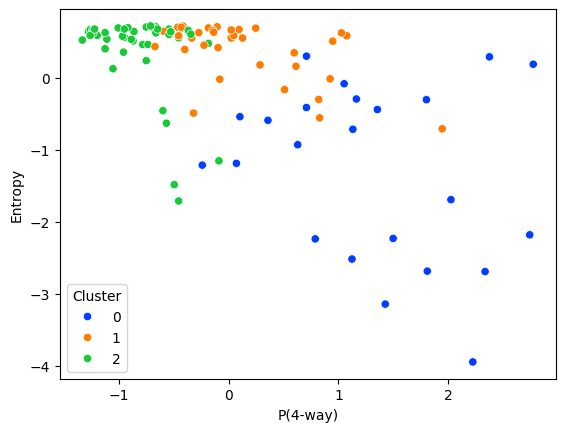

In [ ]:
sns.scatterplot (x='P(4-way)',y= 'Entropy', hue='Cluster', data=df2,palette='bright')
plt.show()

In [ ]:
df2.head()

,Orientation,Entropy,Median,Average_Circuity,P(dead_ends),P(4-way),Cluster
0,-0.330477,0.353647,-0.661487,0.111372,2.665745,-0.956809,2
1,0.699605,-0.541898,3.399520,-0.109897,-0.157872,0.102948,0
2,-0.755946,0.689477,-0.668681,0.332640,1.235113,-1.004618,2
3,-0.746989,0.683258,-0.790979,2.987859,-0.421409,-0.430915,2
4,-0.052803,0.123542,-1.085933,0.332640,0.344105,-1.052426,2


In [ ]:
#generated clusters
df2['Cluster']

0     2
1     0
2     2
3     2
4     2
     ..
95    0
96    0
97    2
98    0
99    0
Name: Cluster, Length: 100, dtype: int32

**Step6**

Hierarchical Clustering

- Explored four linking approaches (single, complete, average) for hierarchical clustering. Clustering results were visualized using dendrograms and scatterplots.



<ipython-input-16-b23feebec2f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df2, palette='viridis')


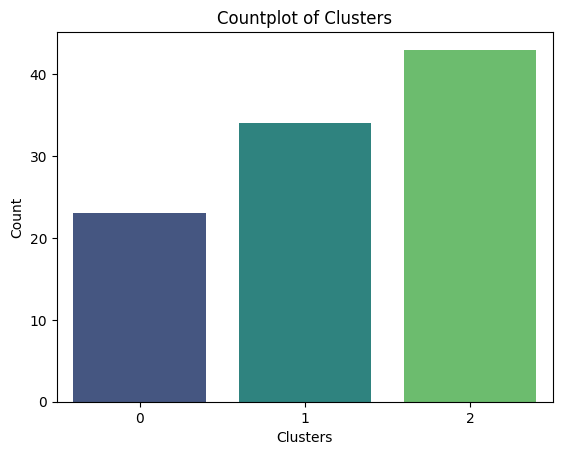

In [ ]:
import seaborn as sns
sns.countplot(x='Cluster', data=df2, palette='viridis')
plt.title('Countplot of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()


In [ ]:
df.head()

,Region,City,Orientation,Entropy,Hw,Median,Average_Circuity,Average_Node,P(dead_ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


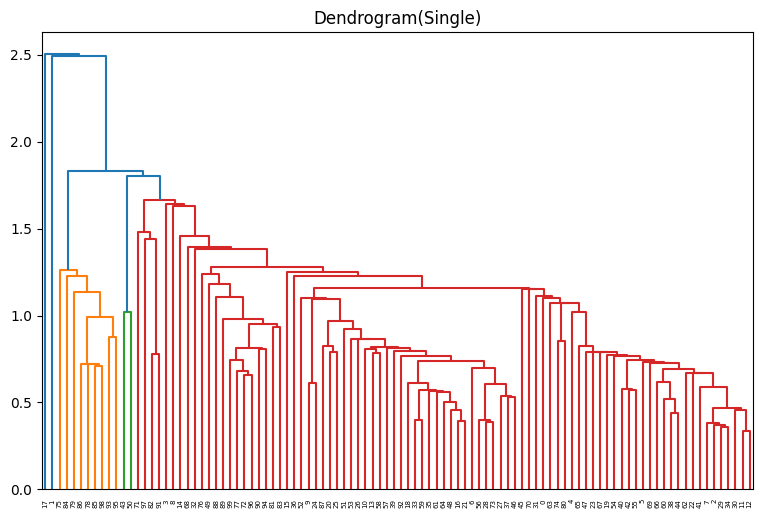

In [ ]:
linkage_methods = ['single']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df2, method=method)  # Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title('Dendrogram(Single)')  # Capitalize the method name for title


plt.tight_layout()
plt.show()

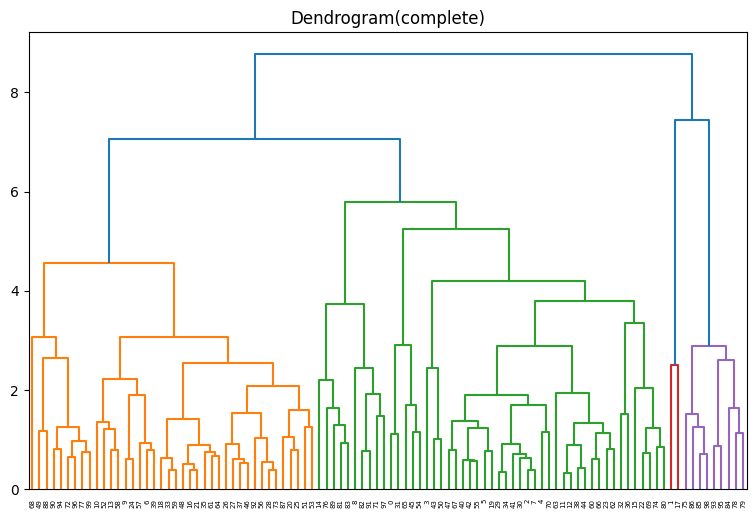

In [ ]:
linkage_methods = ['complete']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df2, method=method)  # Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title('Dendrogram(complete)')  # Capitalize the method name for title


plt.tight_layout()
plt.show()

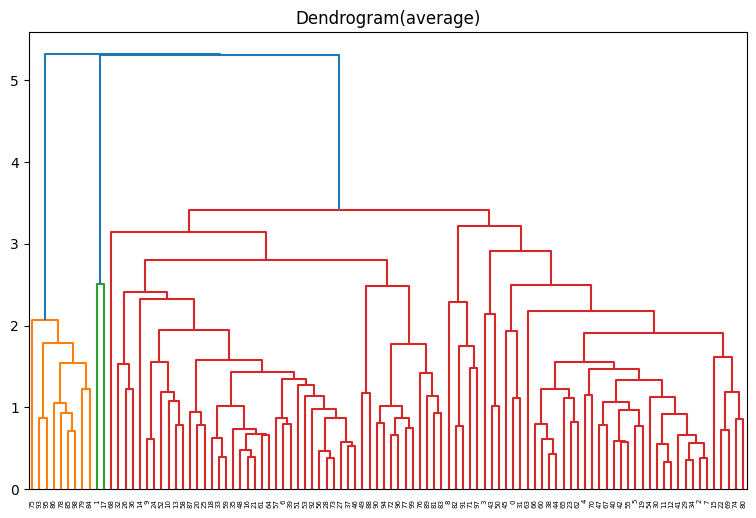

In [ ]:
linkage_methods = ['average']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df2, method=method)  # Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title('Dendrogram(average)')  # Capitalize the method name for title


plt.tight_layout()
plt.show()

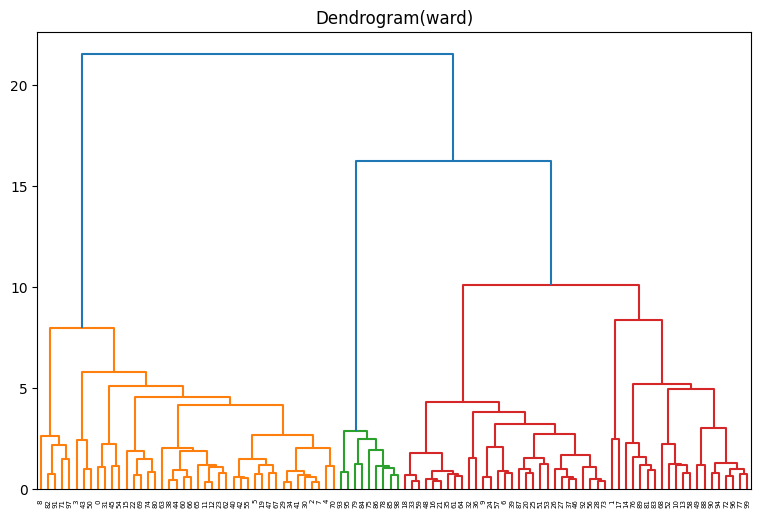

In [ ]:
linkage_methods = ['ward']
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df2, method=method)  # Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title('Dendrogram(ward)')  # Capitalize the method name for title


plt.tight_layout()
plt.show()

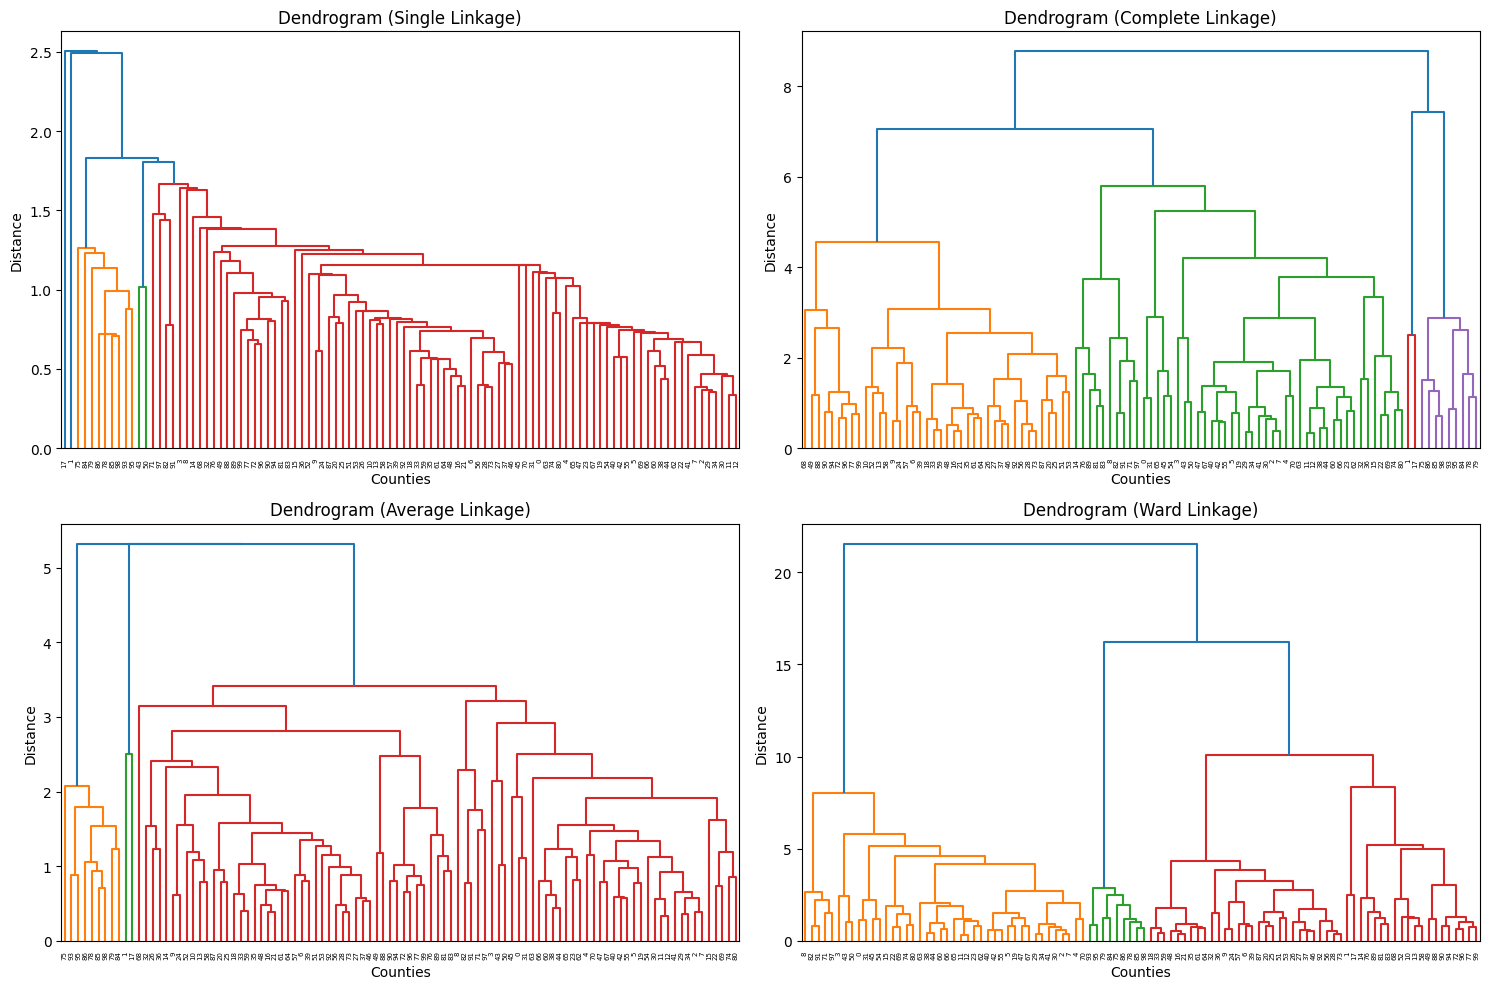

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ['single', 'complete', 'average', 'ward']  # List of linkage methods to try
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df2, method=method)  # Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')  # Capitalize the method name for title
    plt.xlabel('Counties')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

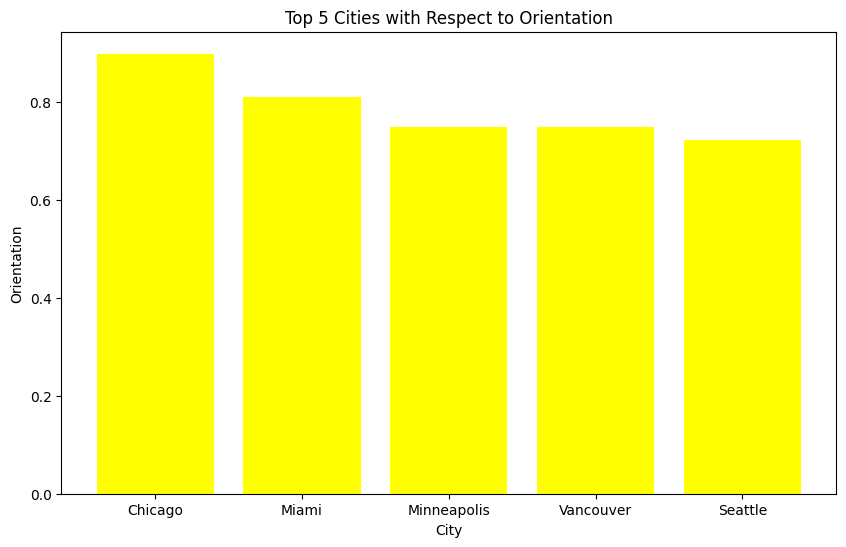

In [ ]:
top_cities = df.sort_values(by='Orientation', ascending=False).head(5)

# Plotting the top 5 cities
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['Orientation'], color='yellow')
plt.xlabel('City')
plt.ylabel('Orientation')
plt.title('Top 5 Cities with Respect to Orientation')
plt.show()

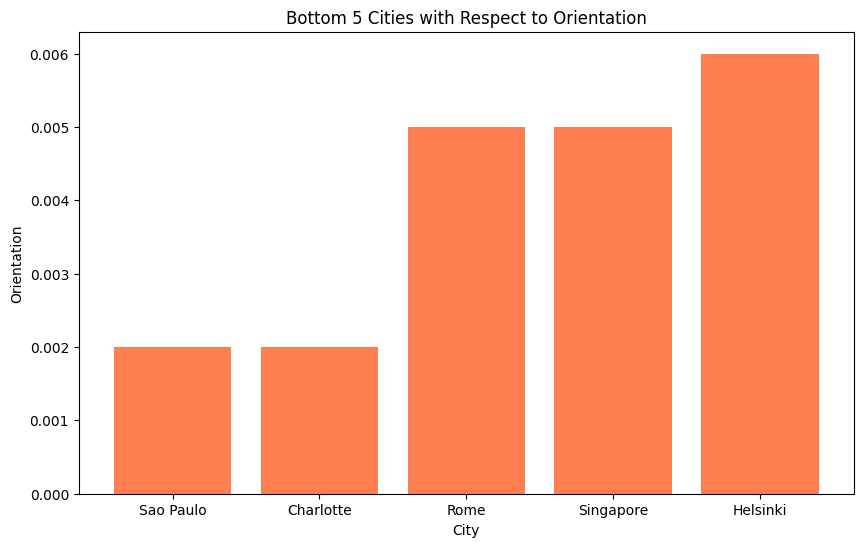

In [ ]:
bottom_cities = df.sort_values(by='Orientation').head(5)

# Plotting the bottom 5 cities
plt.figure(figsize=(10, 6))
plt.bar(bottom_cities['City'], bottom_cities['Orientation'], color='coral')
plt.xlabel('City')
plt.ylabel('Orientation')
plt.title('Bottom 5 Cities with Respect to Orientation')
plt.show()

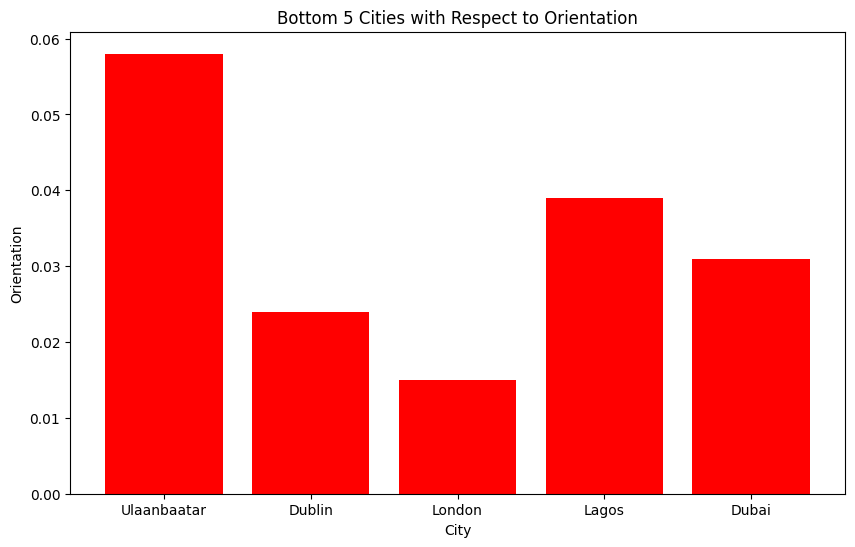

In [ ]:
bottom_cities = df.sort_values(by='P(4-way)').head(5)

# Plotting the bottom 5 cities
plt.figure(figsize=(10, 6))
plt.bar(bottom_cities['City'], bottom_cities['Orientation'], color='red')
plt.xlabel('City')
plt.ylabel('Orientation')
plt.title('Bottom 5 Cities with Respect to Orientation')
plt.show()

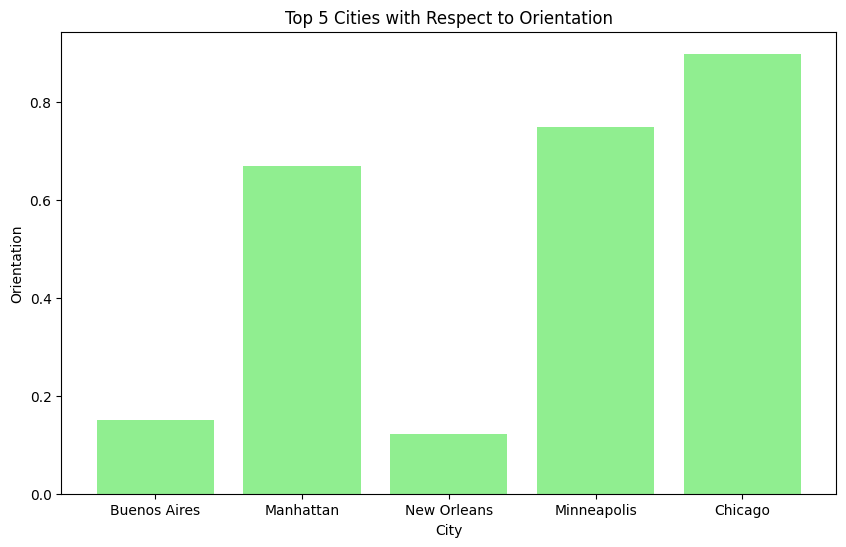

In [ ]:
top_cities = df.sort_values(by='P(4-way)', ascending=False).head(5)

# Plotting the top 5 cities
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['Orientation'], color='lightgreen')
plt.xlabel('City')
plt.ylabel('Orientation')
plt.title('Top 5 Cities with Respect to Orientation')
plt.show()